# Exam Stress Analysis

In [1]:
import numpy as np
import pandas as pd
#import datetime
from datetime import datetime
#import _datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
Grades = pd.read_excel('Exam Stress Final.xlsx',sheet_name = "Grades")
Demography= pd.read_excel('Exam Stress Final.xlsx',sheet_name = "Demography")
EDA = pd.read_excel('Exam Stress Final.xlsx',sheet_name = "EDA")
HR = pd.read_excel('Exam Stress Final.xlsx',sheet_name = "HR")
Temp = pd.read_excel('Exam Stress Final.xlsx',sheet_name = "Temp")
IBI = pd.read_excel('Exam Stress Final.xlsx',sheet_name = "IBI")

In [30]:
EDA['Student_id'].replace('S010','S10',inplace = True)
HR['Student_id'].replace('S010','S10',inplace = True)
Temp['Student_id'].replace('S010','S10',inplace = True)
IBI['Student_id'].replace('S010','S10',inplace = True)
EDA['Exam'].replace('midterm 1','Midterm 1', inplace = True)
EDA['Exam'].replace('midterm 2','Midterm 2', inplace = True)
IBI['Exam'].replace('midterm 1','Midterm 1', inplace = True)
IBI['Exam'].replace('midterm 2','Midterm 2', inplace = True)


In [8]:
#Q.1 Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI

mean_IBI = np.mean(IBI['IBI'])
min30_interval = [IBI[i:i+30] for i in range(10, len(IBI), 39)]
for interval in min30_interval:
    successive_difference = np.diff(interval['IBI'])
    square_difference = np.square(successive_difference)
    mean_square_difference = np.mean(square_difference)
    #print(mean_square_difference)
    rmssd = np.sqrt(mean_square_difference)
    #print(rmssd)
    interval['IBI'] += rmssd
print(interval)
interval['IBI']

      Time in mins       IBI Student_id       Exam
3286           119  0.686799        S10  Midterm 2
3287           120  0.822799        S10  Midterm 2
3288           121  0.739799        S10  Midterm 2
3289           122  0.773799        S10  Midterm 2
3290           123  0.750799        S10  Midterm 2
3291           124  0.771799        S10  Midterm 2
3292           125  0.765799        S10  Midterm 2
3293           126  0.813799        S10  Midterm 2
3294           127  0.763799        S10  Midterm 2
3295           128  0.783799        S10  Midterm 2
3296           129  0.796799        S10  Midterm 2
3297           130  0.829799        S10  Midterm 2
3298           131  0.783799        S10  Midterm 2
3299           132  0.745799        S10  Midterm 2
3300           133  0.833799        S10  Midterm 2
3301           135  0.728799        S10  Midterm 2
3302           136  0.781799        S10  Midterm 2
3303           137  0.706799        S10  Midterm 2
3304           138  0.812799   

C:\Users\bhati\AppData\Local\Temp\ipykernel_6104\93343989.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3286    0.686799
3287    0.822799
3288    0.739799
3289    0.773799
3290    0.750799
3291    0.771799
3292    0.765799
3293    0.813799
3294    0.763799
3295    0.783799
3296    0.796799
3297    0.829799
3298    0.783799
3299    0.745799
3300    0.833799
3301    0.728799
3302    0.781799
3303    0.706799
3304    0.812799
3305    0.592799
3306    0.769799
3307    0.589799
3308    0.556799
3309    0.467799
3310    0.560799
3311    0.488799
3312    0.490799
3313    0.663799
3314    0.499799
Name: IBI, dtype: float64

In [4]:
# Q2. Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam

df_parts = pd.DataFrame(EDA)

# Calculate the maximum 'Time in mins' for each group
max_time_per_group = df_parts.groupby(['Student_id', 'Exam'])['Time in mins'].transform('max')
num_bins = 3
# function to categorize time based on the maximum time within each group
def custom_qcut(x):
    return pd.qcut(range(len(x)), q=num_bins, labels=['first', 'second', 'third'])

df_parts['Time Category'] = df_parts.groupby(['Student_id', 'Exam'])['Time in mins'].transform(custom_qcut)

pd.set_option('display.max_rows', 600)
print(df_parts.head(10))

     EDA  Time in mins Student_id   Exam Time Category
0  0.040             1        S01  final         first
1  0.024             2        S01  final         first
2  0.024             3        S01  final         first
3  0.024             4        S01  final         first
4  0.024             5        S01  final         first
5  0.024             6        S01  final         first
6  0.024             7        S01  final         first
7  0.024             8        S01  final         first
8  0.024             9        S01  final         first
9  0.024            10        S01  final         first


In [7]:
# Q.3 Based on the calculation in question 2, which part of the exam 
#did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress

eda_interval = df_parts[['EDA','Time Category']].groupby(['Time Category']).mean().sort_values(by='EDA', ascending=False).to_dict()
eda_interval = eda_interval['EDA']
stressed_part = max(eda_interval, key=eda_interval.get)
print('Students were most stressed during the ' + stressed_part +  
      ' interval. This interval had the maximum average EDA of ' + str(eda_interval[stressed_part]))

Students were most stressed during the second interval. This interval had the maximum average EDA of 0.3704527607361963


In [24]:
# Q4 : Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student.

def getHRV(dfByStudent, step):
    nDF = dfByStudent.apply(lambda x: x)
    intervals = [nDF[i:i+step] for i in range(0, len(nDF), step)]
    for interval in intervals:
       successive_diffs = np.diff(interval['IBI'])
       squared_diffs = np.square(successive_diffs)
       mean_squared_diffs = np.mean(squared_diffs)
       rmssd = np.sqrt(mean_squared_diffs)
       return rmssd*600

def getStoreHRVByExam(df, step):
    hrvByStudentId={}
    dfByStudent = (df.apply(lambda x: x)).groupby("Student_id")
    hrvByStudent = {}
    for group in dfByStudent.groups:
        hrvByStudent[group] = str(getHRV(dfByStudent.get_group(group), step))
    return hrvByStudent
    
gk=IBI.groupby(["Exam"])
hrvData = {}
hrvData['final_HRV'] = getStoreHRVByExam(gk.get_group('final'), 180)
hrvData['Midterm 1_HRV'] = getStoreHRVByExam(gk.get_group('Midterm 1'), 90)
hrvData['Midterm 2_HRV'] = getStoreHRVByExam(gk.get_group('Midterm 2'), 90)
hrvDF = pd.DataFrame.from_dict(hrvData,orient='index')
invertedDF = hrvDF.transpose() 
invertedDF.insert(0, "Student_id", ['S01','S02','S03','S04','S05','S06','S07','S08','S09','S10'])
print(invertedDF)

    Student_id           final_HRV       Midterm 1_HRV       Midterm 2_HRV
S01        S01    63.4369672474916   89.75965661173275   66.73139180090126
S02        S02  21.995860453616533  128.64666530610896   53.71742545722765
S03        S03   58.26386246982698  138.12003572857532   47.32373611624509
S04        S04   81.03725638912587   97.37472851211956  116.53833968005814
S05        S05   69.86808799924607  149.34611765005093  18.707770421867576
S06        S06   50.77147617802824   144.6967274037264   81.02985716887936
S07        S07    81.5295870179779   135.7531500658787   91.90949352488022
S08        S08  105.95216627545442   70.44847986015554   94.97793427949462
S09        S09  38.063460682209985   130.7614467458057   50.03458529884501
S10        S10   44.85632931181072  117.50657834800646   38.68482848683938


In [5]:
#Q.5 Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp

student01_data = pd.merge(IBI[IBI['Student_id'] == 'S01'],
                          EDA[EDA['Student_id'] == 'S01'],
                          on=['Time in mins', 'Student_id', 'Exam'],
                          how='outer')

student01_data = pd.merge(student01_data,
                          HR[HR['Student_id'] == 'S01'],
                          on=['Time in mins', 'Student_id', 'Exam'],
                          how='outer')

student01_data = pd.merge(student01_data,
                          Temp[Temp['Student_id'] == 'S01'],
                          on=['Time in mins', 'Student_id', 'Exam'],
                          how='outer')

student01_data = student01_data[['Student_id', 'IBI', 'EDA', 'HR', 'TEMP']]
print(student01_data)

    Student_id    IBI    EDA       HR    TEMP
0          S01  0.446    NaN      NaN     NaN
1          S01  0.473  0.040  119.023  22.080
2          S01  0.444  0.024  131.586  22.022
3          S01  0.496  0.024  109.852  22.339
4          S01  0.448  0.024  102.488  19.247
..         ...    ...    ...      ...     ...
758        S01    NaN  0.025  145.434  22.455
759        S01    NaN  0.025  121.097  22.459
760        S01    NaN  0.025  127.286  22.458
761        S01    NaN  0.025  129.484  22.462
762        S01    NaN  0.025  133.889  22.469

[763 rows x 5 columns]


In [6]:
#Q6: Calulate the age and Display Age and drop the Date of Birth with iteratively.(Replace DOB for other questions when complete)

#print(f"Demography before Replacing DOB")
#print(Demography)

# Calculate Age 
def Calc_Age(birthday):
    birthday_string = birthday.strftime("%Y-%m-%d")
    birthday = datetime.strptime(birthday_string, '%Y-%m-%d')
    today = datetime.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

# Iteratively calculate & display age and drop the date of birth
for i, rows in Demography.iterrows():
    age = Calc_Age(rows['DOB'])
    #print(f"Age is {age}")
    Demography.at[i,'Age'] = int(age)

Demography.drop('DOB', axis=1, inplace=True)

# Display the updated Demography after droping DOB
print(f"Demography after adding age and dropping DOB")
print(Demography)

#Replace DOB for other questions
New_Demo= pd.read_excel('Exam Stress Final.xlsx',sheet_name = "Demography")
Demography['DOB'] = pd.to_datetime(New_Demo['DOB'])
print(f"\nDemography after Replacing DOB for other questions")
print(Demography)


Demography after adding age and dropping DOB
  Student_id First Name  Last Name Gender     Race   Age
0        S01    Barbara    Walters      F    White  14.0
1        S02       Nora      Jones      F    White  14.0
2        S03    Gabriel    Willows      F    Asian  14.0
3        S04       John        Doe      M    Asian  14.0
4        S05       Jane        Doe      F  African  14.0
5        S06        Pat     Murray      M  African  15.0
6        S07      Roger  Frederick      M  African  13.0
7        S08       John      Wills      M    White  14.0
8        S09       Paul    Cartney      M    White  14.0
9        S10     Janice      Smith      F  Spanish  14.0

Demography after Replacing DOB for other questions
  Student_id First Name  Last Name Gender     Race   Age        DOB
0        S01    Barbara    Walters      F    White  14.0 2009-01-01
1        S02       Nora      Jones      F    White  14.0 2009-02-02
2        S03    Gabriel    Willows      F    Asian  14.0 2009-07-12
3   

In [5]:
 #Q7.Using numpy functions, transpose and multiply the following arrays
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
print(a)
print(b)
t_pose_a = np.transpose(a)
t_pose_b = np.transpose(b)

Final_arr = np.dot(t_pose_a,t_pose_b)

print("Transposed array a:")
print(t_pose_a)

print("\nTransposed array b:")
print(t_pose_b)

print("\nMultiplication of transposed arrays:")
print(Final_arr)

[[0 1]
 [2 3]]
[[0 1]
 [2 3]
 [4 5]]
Transposed array a:
[[0 2]
 [1 3]]

Transposed array b:
[[0 2 4]
 [1 3 5]]

Multiplication of transposed arrays:
[[ 2  6 10]
 [ 3 11 19]]


In [57]:
#Q8. Write a Python program to create an array of 5 integers and display the array items in reverse 
#orderany_array = np.arange(5)

any_array = np.arange(5)
print("Array:", any_array)
print("Array in reverse order:", np.flip(any_array))

Array: [0 1 2 3 4]
Array in reverse order: [4 3 2 1 0]


Average of Both Midterms: 147.4
Average of the Final Exam: 156.7


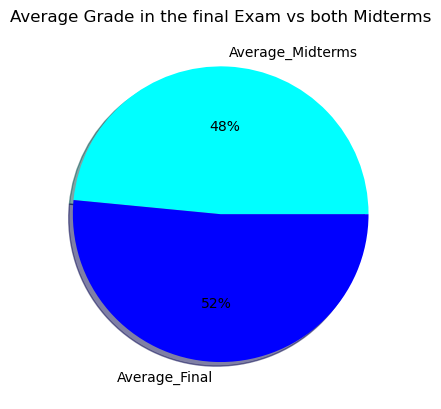

In [11]:
#9. What was the average grade for all students in the final exam vs both midterms

cols = ['Midterm 1', 'Midterm 2']
Grades['Midterms_total']= Grades[cols].sum(axis=1)
Grades
Avg_midterms = Grades['Midterms_total'].mean()
Avg_final = Grades['final'].mean()
print('Average of Both Midterms:', Avg_midterms)
print('Average of the Final Exam:', Avg_final)
plt.pie([147.4,156.7],
        labels=["Average_Midterms","Average_Final"],
        autopct= '%1.0f%%',
        colors=["cyan","Blue"],
        shadow= True)
plt.title("Average Grade in the final Exam vs both Midterms")
plt.show()

In [8]:
#Q. 10. Which students basal body temperature was highest during the second part of the exam?

max_time = Temp.groupby(['Student_id', 'Exam'])['Time in mins'].max().reset_index()
last_min = max_time['Time in mins'].max()
time_bins = [0, (last_min/3), (last_min/3)*2, last_min]
Temp['Time Part'] = pd.cut(Temp['Time in mins'], bins=time_bins, labels=['First', 'Second', 'Third'])
pd.set_option('display.max_rows', 100)
print(Temp.head(10))

second_Temp= Temp[Temp["Time Part"]=="Second"]
second_Temp
highest_temp = second_Temp.max(axis=0)
print("Highest Temperature in Second part of Exam:",highest_temp)

     TEMP  Time in mins Student_id   Exam Time Part
0  22.080             1        S01  final     First
1  22.048             2        S01  final     First
2  22.022             3        S01  final     First
3  22.339             4        S01  final     First
4  22.416             5        S01  final     First
5  22.346             6        S01  final     First
6  20.648             7        S01  final     First
7  19.247             8        S01  final     First
8  19.401             9        S01  final     First
9  18.624            10        S01  final     First
Highest Temperature in Second part of Exam: TEMP            36.042
Time in mins       286
Student_id         S10
Exam             final
Time Part       Second
dtype: object


In [9]:
#Q11.What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females?

#Top 3 Grades in final exam
Top3Grades = Grades[['Student_id','final']].sort_values(by='final',ascending = False).head(3)
#Top3Grades
#% of the top 3 grades belonged to males vs females?
Top3Values = pd.merge(Top3Grades,Demography, on="Student_id")
gender_counts = Top3Values['Gender'].value_counts()
total_count = len(Top3Values)
gender_percentages = round((gender_counts / total_count) * 100, 2)

print(f"Top 3 Grade Belongs To:\n{gender_percentages}")

Top 3 Grade Belongs To:
Gender
F    66.67
M    33.33
Name: count, dtype: float64


In [10]:
# Q12.phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe
phonebook = {}
phonebook["John"] = 938477566
phonebook["Jack"] = 938377264
phonebook["Jill"] = 947662781
if "Joe"  in phonebook:
    print("Joe is listed in the phonebook.", phonebook["Joe"])
else: 
    print("Joe is not listed in the phonebook")

Joe is not listed in the phonebook


In [11]:
# Q13. How many minutes did the midterm 2 last( on average) for all 10 students 

df = pd.DataFrame(EDA)


midterm2_df = df[df['Exam'] == 'Midterm 2']

# Calculate the average duration of Midterm 2 for all students
average_duration = midterm2_df.groupby('Student_id')['Time in mins'].max()

# Display the result
print(f"The average duration of Midterm 2 for all 10 students is:\n{average_duration}")

The average duration of Midterm 2 for all 10 students is:
Student_id
S01    185
S02    231
S03    170
S04    223
S05    200
S06    236
S07    180
S08    166
S09    207
S10    216
Name: Time in mins, dtype: int64


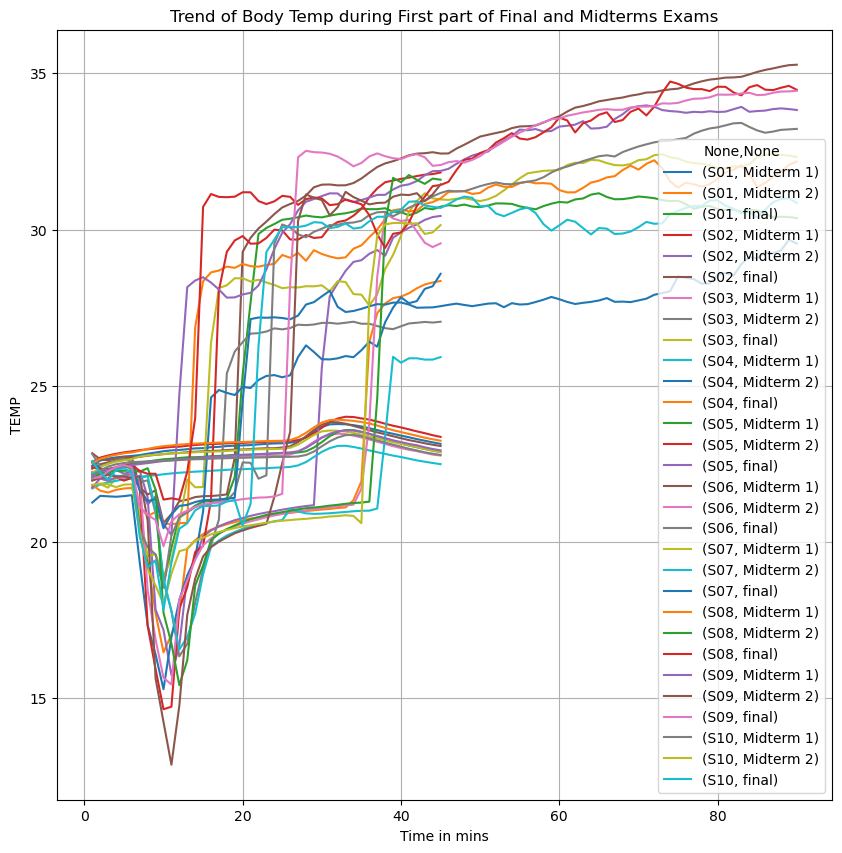

In [5]:
# Q14. Analyze the trend of body temp at the start of the exam. Were body temperatures higher or lower in the first part of the exam. What is the overall trend?

final_start = Temp[(Temp['Exam'] == 'final') & (Temp['Time in mins'] <= 90)]
midterm_start = Temp[(Temp['Exam'].str.contains('Midterm')) & (Temp['Time in mins'] <= 45)]
mergedexams = pd.concat([final_start, midterm_start], ignore_index=True, sort=False)
mergedexams.set_index('Time in mins', inplace=True)
mergedexams.groupby(['Student_id','Exam'])['TEMP'].plot(legend=True, figsize=(10, 10), grid = True,title='Trend of Body Temp during First part of Final and Midterms Exams', )
plt.ylabel("TEMP")
plt.show()

In [26]:
#Q.15 What % of all students had a HR>80 and an HRV<30 in the second part of the finals?
max_time_HR = HR.groupby(['Student_id', 'Exam'])['Time in mins'].max().reset_index()
last_min = max_time_HR['Time in mins'].max()
time_bins = [0, (last_min/3), (last_min/3)*2, last_min]
HR['Time Part'] = pd.cut(Temp['Time in mins'], bins=time_bins, labels=['First', 'Second', 'Third'])
pd.set_option('display.max_rows', 100)
second_part_finals = HR[(HR['Time Part'] == 'Second')]
invertedDF['final_HRV'] = invertedDF['final_HRV'].astype(float)
filtered_students = second_part_finals[(second_part_finals['HR'] > 80) & (invertedDF['final_HRV'] < 30)]
percentage = (len(filtered_students) / len(second_part_finals)) * 100
print(f"The percentage of students with HR > 80 and HRV < 30 in the second part of the finals: {percentage:.2f}%")

The percentage of students with HR > 80 and HRV < 30 in the second part of the finals: 0.00%


C:\Users\bhati\AppData\Local\Temp\ipykernel_6104\2564657010.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [12]:
# Q16. What was the % difference between scores in both mid-terms vs the final

df_Grades = pd.DataFrame(Grades)
Midterm_Percentage = ((df_Grades['Midterm 1'] + df_Grades['Midterm 2']) / 200) * 100
Final_Percentage = (df_Grades['final'] / 200) * 100
df_Grades['difference'] = abs(Final_Percentage - Midterm_Percentage)

print(f"Percentage difference between scores in Midterm Vs. Final:\n")
print(df_Grades[['Student_id','difference']])

Percentage difference between scores in Midterm Vs. Final:

  Student_id  difference
0        S01        11.0
1        S02         6.5
2        S03        10.5
3        S04         1.5
4        S05         6.5
5        S06        20.0
6        S07         6.5
7        S08         2.0
8        S09         3.5
9        S10        18.5


In [22]:
#Q17. What % of all students are Asian
asian_df = Demography.loc[Demography['Race'] == 'Asian'] 
100*len(asian_df)/len(Demography)

20.0

In [13]:
# Q18. Display the full name of all students born in 2010  

print("Full names of students born in 2010:")
get_data = Demography[Demography['DOB'].dt.year == 2010]

for index, row in get_data.iterrows():
    full_name = f"{row['First Name']} {row['Last Name']}"
    print(full_name)

Full names of students born in 2010:
Roger Frederick


In [14]:
#Q19. What was the average HR of the students who achieved the top 3 grades in mid-term 2

top_grade=Grades.nlargest(3,"Midterm 2")
merged_HR_Grades = pd.merge(Grades,HR, left_on='Student_id', right_on='Student_id')
Heart_rate_S02 = HR[HR["Student_id"]=="S02"]
Avg_HR_S02 = Heart_rate_S02.groupby("Student_id"or"HR")["HR"].mean()
Heart_rate_S03 = HR[HR["Student_id"]=="S03"]
Avg_HR_S03 = Heart_rate_S03.groupby("Student_id"or"HR")["HR"].mean()
Heart_rate_S08 = HR[HR["Student_id"]=="S08"]
Avg_HR_S08 = Heart_rate_S08.groupby("Student_id"or"HR")["HR"].mean()
Avg_HR= np.array([Avg_HR_S02, Avg_HR_S03, Avg_HR_S08])
print('Average HR for Top 3 grade students in Midterm 2 = ' + str(Avg_HR.mean()))

Average HR for Top 3 grade students in Midterm 2 = 107.69107029563533


<Axes: title={'center': 'Grades of students in Midterm1 '}, xlabel='Student_id'>

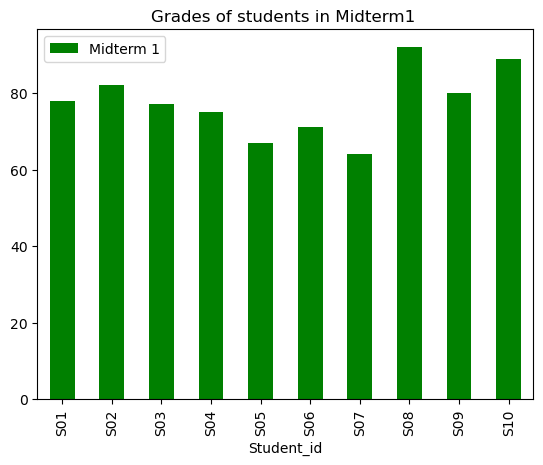

In [15]:
#Q20. Use a bar chart to display the grades of every student in mid term 1
Grades.plot.bar(title="Grades of students in Midterm1 ",x="Student_id",y="Midterm 1",color={"green"})

In [16]:
# Q.21 What % of all students are female?

female_percentage = (Demography['Gender'].value_counts()['F'] / Demography.shape[0]) * 100
print(f"Female Students:{female_percentage}%")

Female Students:50.0%


In [23]:
# Q.22 Show the students for whom temperature fell below basal body temp of 36 degree
#temp_df=Temp['TEMP']
#print(temp_df)
basal_df=Temp.loc[Temp['TEMP'] < 36]
print(basal_df)

        TEMP  Time in mins Student_id       Exam
0     22.080             1        S01      final
1     22.048             2        S01      final
2     22.022             3        S01      final
3     22.339             4        S01      final
4     22.416             5        S01      final
...      ...           ...        ...        ...
7369  22.344           212       S010  Midterm 2
7370  22.341           213       S010  Midterm 2
7371  22.344           214       S010  Midterm 2
7372  22.342           215       S010  Midterm 2
7373  22.346           216       S010  Midterm 2

[7367 rows x 4 columns]


In [15]:
#Q.23 Connect to sql and query the data in temp into a table of the same name
import pyodbc
import sqlalchemy

# Create SQL connection (change server and database name accordingly)
conn_string = "Driver= {SQL Server Native Client 11.0};Server=DESKTOP-JANN5A2\SQLEXPRESS;Database=demoDB;Trusted_Connection=yes;"
conn = pyodbc.connect(conn_string)
cursor = conn.cursor()

# Create table and load data from data frame
engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={conn_string}", fast_executemany=True)
Temp.to_sql("Temp", engine, if_exists="replace", index=False)

# Print data from table
cursor.execute("SELECT * FROM Temp")
for row in cursor:
                   print(row)

(22.08, 1, 'S01', 'final')
(22.048, 2, 'S01', 'final')
(22.022, 3, 'S01', 'final')
(22.339, 4, 'S01', 'final')
(22.416, 5, 'S01', 'final')
(22.346, 6, 'S01', 'final')
(20.648, 7, 'S01', 'final')
(19.247, 8, 'S01', 'final')
(19.401, 9, 'S01', 'final')
(18.624, 10, 'S01', 'final')
(19.807, 11, 'S01', 'final')
(20.803, 12, 'S01', 'final')
(20.958, 13, 'S01', 'final')
(21.158, 14, 'S01', 'final')
(21.29, 15, 'S01', 'final')
(21.302, 16, 'S01', 'final')
(21.332, 17, 'S01', 'final')
(21.391, 18, 'S01', 'final')
(22.07, 19, 'S01', 'final')
(25.366, 20, 'S01', 'final')
(27.665, 21, 'S01', 'final')
(29.856, 22, 'S01', 'final')
(30.051, 23, 'S01', 'final')
(30.176, 24, 'S01', 'final')
(30.312, 25, 'S01', 'final')
(30.345, 26, 'S01', 'final')
(30.393, 27, 'S01', 'final')
(30.447, 28, 'S01', 'final')
(30.409, 29, 'S01', 'final')
(30.389, 30, 'S01', 'final')
(30.443, 31, 'S01', 'final')
(30.489, 32, 'S01', 'final')
(30.52, 33, 'S01', 'final')
(30.574, 34, 'S01', 'final')
(30.672, 35, 'S01', 'final'

In [31]:
# Q24. Display a sunburst chart of count of students by Age, Gender and Race

# Calculate Age
def Calc_Age(birthday):
   birthday_string = birthday.strftime("%Y-%m-%d")
   birthday = datetime.strptime(birthday_string, '%Y-%m-%d')
   today = datetime.today()
   return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
# Iteratively calculate & display age and drop the date of birth
for i, rows in Demography.iterrows():
   age = Calc_Age(rows['DOB'])
   print(f"Age is {age}")
   Demography.at[i,'Age'] = int(age)
Demography
fig_24_1=px.sunburst(Demography,path=['Gender','Race','Age'],title='Count of Students by Gender,Race and Age',
               color='Gender')
fig_24_1.show()

Age is 14
Age is 14
Age is 14
Age is 14
Age is 14
Age is 15
Age is 13
Age is 14
Age is 14
Age is 14


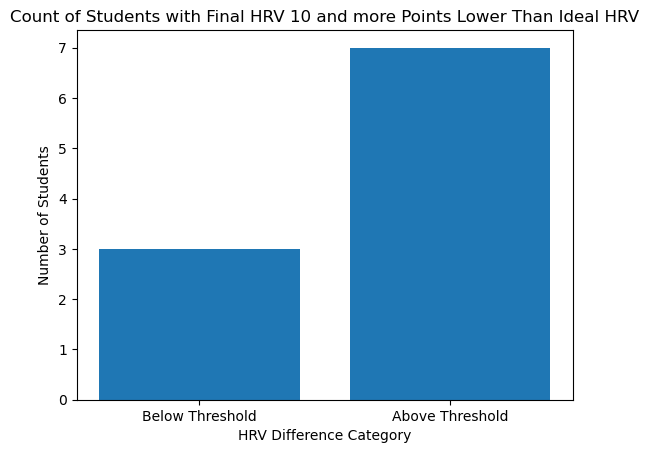

In [25]:
#Q25. Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.
#print(invertedDF['final_HRV'])


ideal_hrv = 55
#print(ideal_hrv)
#filtered_data = data.query("HRV < 15")

invertedDF['hrv_difference']  = ideal_hrv - invertedDF['final_HRV'].astype(float)


students_below_threshold = invertedDF[invertedDF['hrv_difference'] >= 10]

n_below_threshold = len(students_below_threshold)
n_above_threshold = len(invertedDF) - n_below_threshold
categories = ['Below Threshold', 'Above Threshold']
student_counts = [n_below_threshold, n_above_threshold]

plt.bar(categories, student_counts)
plt.title('Count of Students with Final HRV 10 and more Points Lower Than Ideal HRV')
plt.ylabel('Number of Students')
plt.xlabel('HRV Difference Category')
plt.show()


In [32]:
#Q.26 Plot a graph to show the distribution of score in the final exam by gender

df_GS = pd.merge(Grades,Demography, on="Student_id")
figure_261 = px.bar(df_GS, x="final", y="Student_id",color="Gender",
                   color_discrete_map={'F': 'lightpink','M': 'lightblue'},
                   text_auto='3s')

# Update the layout
figure_261.update_layout(title='Distribution of score in the final exam by gender',
                  xaxis_title='Scores Of Final Exam',
                  yaxis_title='Number of students')

figure_261.update_traces(marker=dict(line=dict(width=0.5, color='black')))
figure_261.update_xaxes(showgrid=False)
figure_261.update_yaxes(showgrid=False)
# Display Graph
figure_261.show()

In [24]:
#  Q27.Which demographic has the lowest average of scores in all 3 exams
Grades['avg'] =(Grades['Midterm 1']+Grades['Midterm 2']+Grades['final'])/3
print(Grades)
Grades.min(axis=0)
# Which row has min avg value
Avg_Student=(Grades[Grades.avg == Grades.avg.min()]['Student_id'])
avg_student_rec = Avg_Student.iloc[0]
#Demography.info()
print(Demography.loc[Demography['Student_id'] == avg_student_rec ])

  Student_id  Midterm 1  Midterm 2  final         avg
0        S01         78         82    182  114.000000
1        S02         82         85    180  115.666667
2        S03         77         90    188  118.333333
3        S04         75         77    149  100.333333
4        S05         67         77    157  100.333333
5        S06         71         64    175  103.333333
6        S07         64         33    110   69.000000
7        S08         92         88    184  121.333333
8        S09         80         39    126   81.666667
9        S10         89         64    116   89.666667
  Student_id        DOB First Name  Last Name Gender     Race
6        S07 2010-08-01      Roger  Frederick      M  African


In [63]:
# Q28. Delete the column age from question 6, using an iterative loop

df = pd.DataFrame(Demography)

# Delete the 'Age' column iteratively
for index, row in df.iterrows():
    # Drop the 'Age' column within the loop
    df = df.drop(columns=['Age'], errors='ignore')

print(df)

  Student_id        DOB First Name  Last Name Gender     Race
0        S01 2009-01-01    Barbara    Walters      F    White
1        S02 2009-02-02       Nora      Jones      F    White
2        S03 2009-07-12    Gabriel    Willows      F    Asian
3        S04 2009-09-09       John        Doe      M    Asian
4        S05 2009-05-06       Jane        Doe      F  African
5        S06 2008-04-04        Pat     Murray      M  African
6        S07 2010-08-01      Roger  Frederick      M  African
7        S08 2009-03-03       John      Wills      M    White
8        S09 2009-10-23       Paul    Cartney      M    White
9        S10 2009-11-14     Janice      Smith      F  Spanish


<Axes: >

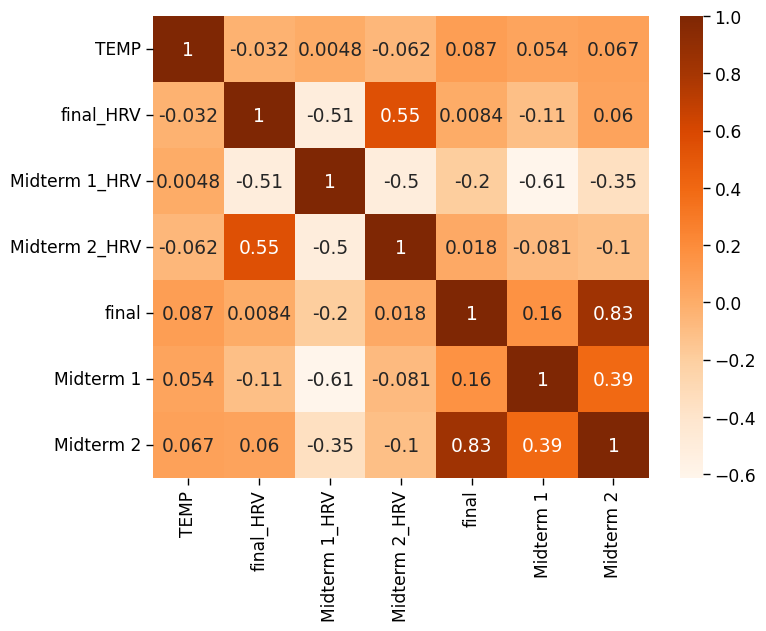

In [16]:
# Q29. Create a heat map of HRV, temp and scores. To show the correlation beween these variables

heat_map = pd.merge(pd.merge(Temp, Grades, on='Student_id'), invertedDF, on='Student_id')
select_columns = heat_map[['TEMP', 'final_HRV','Midterm 1_HRV','Midterm 2_HRV','final','Midterm 1','Midterm 2']]
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
heat_map_corr = select_columns.corr()
sns.heatmap(heat_map_corr,annot=True,cmap='Oranges')

In [18]:
#Q.30. Use the dataset given and Enumerate in Python with any example.

enumerate_demography = enumerate(Demography,start=1)
for title in enumerate_demography:
    print(f'{title[0]}-{title[1]}')

1-Student_id
2-DOB
3-First Name
4-Last Name
5-Gender
6-Race
7-Age


<Figure size 1000x600 with 0 Axes>

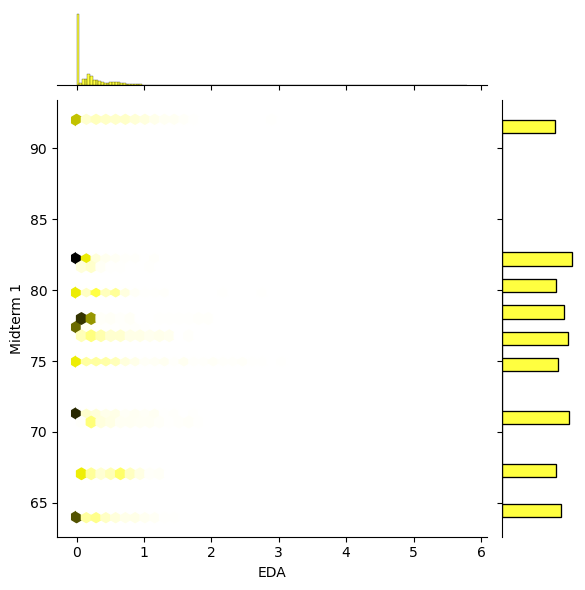

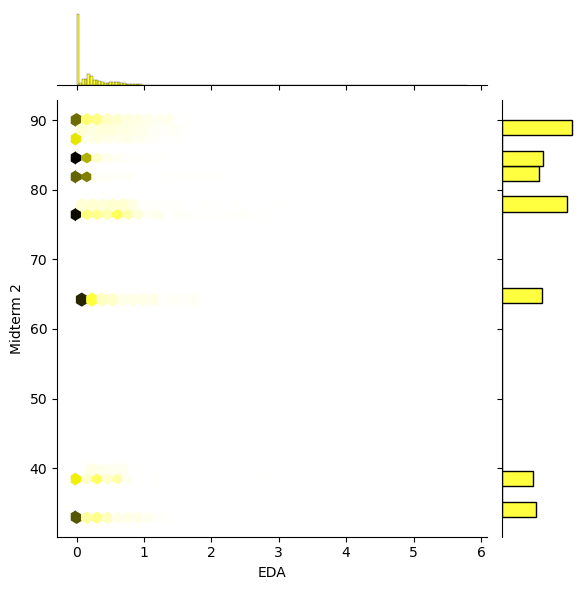

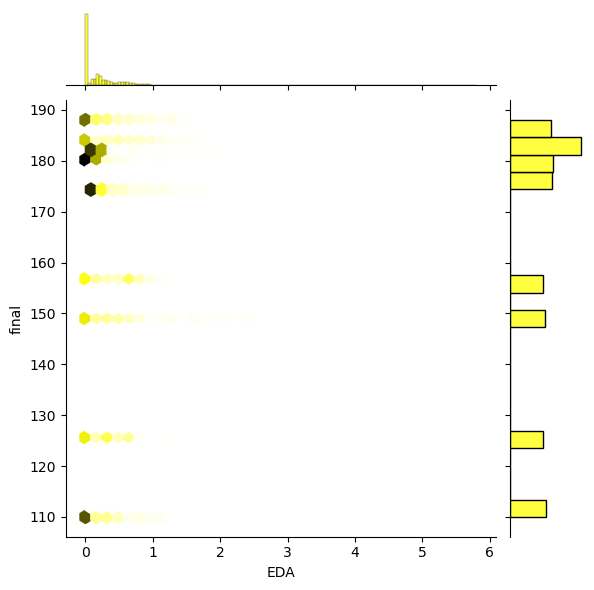

In [24]:
#Q.31 Create a jointplot on EDA & Grades.
jpGraph = pd.merge(EDA,Grades, on="Student_id")

plt.figure(figsize=(10, 6))
sns.jointplot(x='EDA', y='Midterm 1', data=jpGraph, kind='hex', color = 'yellow')
plt.show()
sns.jointplot(x='EDA', y='Midterm 2', data=jpGraph, kind='hex',color = 'yellow')
plt.show()
sns.jointplot(x='EDA', y='final', data=jpGraph, kind='hex',color = 'yellow')
plt.show()

In [25]:
#Q32.Use indexing , loc to retrieve the row with maximum HR

HR_df=HR.loc[HR['HR'].idxmax()]
print(HR_df)

HR                199.278
Time in mins         41.0
Student_id            S04
Exam            Midterm 1
Name: 2720, dtype: object


In [19]:
# Q33. Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

merged_df = pd.merge(HR, EDA, on = ['Student_id', 'Exam', 'Time in mins'])
merged_df = pd.merge(merged_df, Temp, on = ['Student_id', 'Exam', 'Time in mins'])
display(pd.pivot_table(merged_df, columns='Student_id', values=['HR','EDA','TEMP'], aggfunc='mean'))

Student_id,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
EDA,0.161171,0.111534,0.272532,0.464468,0.371345,0.256905,0.208034,0.394047,0.299416,0.149369
HR,106.522138,114.313813,103.283502,98.399456,104.806015,104.793488,103.842102,105.475896,98.802752,106.231091
TEMP,26.475624,28.224066,26.899314,26.826271,28.559724,27.228459,25.569712,28.472022,28.453486,26.187834


In [20]:
# Q34. Display the Student Demographics and Grades who are born in leap Year

merged_demoGrad = pd.merge(Demography,Grades, left_on='Student_id', right_on='Student_id')
leap_year_students = merged_demoGrad[merged_demoGrad['DOB'].dt.year % 4 == 0]
leap_year_students

,Student_id,DOB,First Name,Last Name,Gender,Race,Age,Midterm 1,Midterm 2,final,Midterms_total
5,S06,2008-04-04,Pat,Murray,M,African,15.0,71,64,175,135


In [21]:
# 35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'.

Grades['Average'] = (Grades['Midterm 1'] + Grades['Midterm 2'] + Grades['final']) / 3

bins = [65, 85, 105, float('inf')]
labels = ['C', 'B', 'A']

Grades['New_grades'] = pd.cut(Grades['Average'], bins=bins, labels=labels, right=False)

new_grades = Grades[['Student_id', 'Midterm 1', 'Midterm 2', 'final', 'Average', 'New_grades']]
print(new_grades)

  Student_id  Midterm 1  Midterm 2  final     Average New_grades
0        S01         78         82    182  114.000000          A
1        S02         82         85    180  115.666667          A
2        S03         77         90    188  118.333333          A
3        S04         75         77    149  100.333333          B
4        S05         67         77    157  100.333333          B
5        S06         71         64    175  103.333333          B
6        S07         64         33    110   69.000000          C
7        S08         92         88    184  121.333333          A
8        S09         80         39    126   81.666667          C
9        S10         89         64    116   89.666667          B


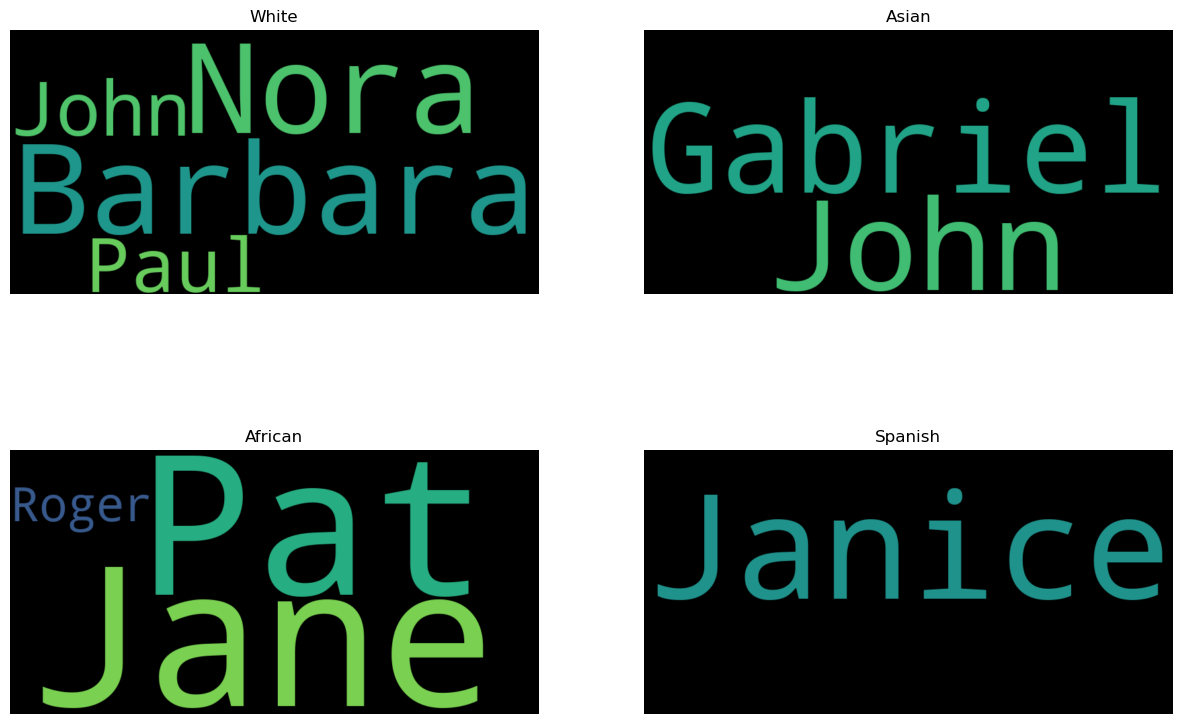

In [4]:
#Q.36 Create a Word Cloud with First name of Student Names based on thier Race 

wordclouds = {}
for race in Demography['Race'].unique():
    text = ' '.join(Demography[Demography['Race'] == race]['First Name'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    wordclouds[race] = wordcloud

figure_36 = plt.figure(figsize=(15, 10))
for i, (race, wordcloud) in enumerate(wordclouds.items(), 1):
    ax_36 = figure_36.add_subplot(2, 2, i)
    ax_36.imshow(wordcloud, interpolation='bilinear')
    ax_36.set_title(race)
    ax_36.axis('off')

plt.show()

In [34]:
#Q37.Display the student Names and respective grades who has Maximum heart rate



HR_df=HR.loc[HR['HR'].idxmax()]
student_max_hr=HR_df['Student_id']


Demography_df1=Demography.loc[Demography['Student_id']== student_max_hr]
Grades_df1=Grades.loc[Grades['Student_id']==student_max_hr]
Student_grade=Grades_df1[HR_df['Exam']]
print(HR_df)
print(student_max_hr)
print(Demography_df1)
print(Grades_df1)
print(Student_grade)

HR                199.278
Time in mins         41.0
Student_id            S04
Exam            Midterm 1
Name: 2720, dtype: object
S04
  Student_id        DOB First Name Last Name Gender   Race
3        S04 2009-09-09       John       Doe      M  Asian
  Student_id  Midterm 1  Midterm 2  final         avg
3        S04         75         77    149  100.333333
3    75
Name: Midterm 1, dtype: int64


In [22]:
# 38. Write a Python program to get the number of occurrences of a specified element in the array.

def count_occurrences(arr, target):
    try:
        # Use the count method to get the number of occurrences
        occurrences = arr.count(target)
        return occurrences
    except ValueError:
        # Handle the case where the element is not present in the array
        return 0

if __name__ == "__main__":
 
    try:
        array_input = input("Enter elements of the array separated by spaces: ")
        my_array = list(map(int, array_input.split()))
        print(my_array)
    except ValueError:
        print("Invalid input. Please enter integers separated by spaces.")
        exit()

    
    try:
        specified_element = int(input("Enter the element to count: "))
    except ValueError:
        print("Invalid input. Please enter an integer.")
        exit()

    
    result = count_occurrences(my_array, specified_element)
    print(f'The element {specified_element} occurs {result} times in the array.')

[5, 5, 5, 5]
The element 5 occurs 4 times in the array.


In [23]:
# Q39. Create a 3D list using nested for loops.

def create_3d_list_1(x, y, z):
    lst = []
    for i in range(x):
        lst_2d = []
        for j in range(y):
            lst_1d = []
            for k in range(z):
                lst_1d.append('2')
            lst_2d.append(lst_1d)
        lst.append(lst_2d)
    return lst
 
# Input 1
x = 3
y = 3
z = 3
output_1 = create_3d_list_1(x, y, z)
print(output_1)
 
# Input 2
x = 5
y = 3
z = 2
output_2 = create_3d_list_1(x, y, z)
print(output_2)

[[['2', '2', '2'], ['2', '2', '2'], ['2', '2', '2']], [['2', '2', '2'], ['2', '2', '2'], ['2', '2', '2']], [['2', '2', '2'], ['2', '2', '2'], ['2', '2', '2']]]
[[['2', '2'], ['2', '2'], ['2', '2']], [['2', '2'], ['2', '2'], ['2', '2']], [['2', '2'], ['2', '2'], ['2', '2']], [['2', '2'], ['2', '2'], ['2', '2']], [['2', '2'], ['2', '2'], ['2', '2']]]


In [24]:
#Q.40. Array = [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] Display each row of this array as a separate slice.

array = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
for x in range(array.shape[0]):
    print(f"Row {x}:",array[x, :])

Row 0: [1 2 3]
Row 1: [4 5 6]
Row 2: [7 8 9]


In [25]:
# Q.41 Find the Student name and the Exam who has the Temprature '36.042'

Temp36 = Temp[Temp.TEMP == 36.042]
StudentName = pd.merge(Temp36,Demography, on="Student_id")
SName = StudentName[["First Name","Last Name","Exam","TEMP"]]
SName.head()

,First Name,Last Name,Exam,TEMP
0,Nora,Jones,final,36.042


In [26]:
 #Q42.Using arrays and loops, find the count of students based on gender.
Gender_df =  Demography['Gender']
 # Dictionary to store the count of students based on gender
Gender_count = {"M": 0, "F": 0}

Gender_array = Gender_df.to_numpy()
# Loop through the list of students and count based on gender
for Gender in Gender_array:
    #Gender = Gender_df['Gender']
    Gender_count[Gender] += 1

# Print the results
print("Number of Male students:", Gender_count["M"])
print("Number of Female students:", Gender_count["F"])

Number of Male students: 5
Number of Female students: 5


In [26]:
# 43. Generate Unique Student ID  using Lamda Function.
df = pd.DataFrame(Demography)

# Generate unique student IDs using a lambda function
df['UniqueSID'] = df.apply(lambda row: f"Stu{int(row.name) + 1:02d}", axis=1)

print(df[['Student_id','UniqueSID', 'DOB', 'First Name', 'Last Name', 'Gender', 'Race']])

  Student_id UniqueSID        DOB First Name  Last Name Gender     Race
0        S01     Stu01 2009-01-01    Barbara    Walters      F    White
1        S02     Stu02 2009-02-02       Nora      Jones      F    White
2        S03     Stu03 2009-07-12    Gabriel    Willows      F    Asian
3        S04     Stu04 2009-09-09       John        Doe      M    Asian
4        S05     Stu05 2009-05-06       Jane        Doe      F  African
5        S06     Stu06 2008-04-04        Pat     Murray      M  African
6        S07     Stu07 2010-08-01      Roger  Frederick      M  African
7        S08     Stu08 2009-03-03       John      Wills      M    White
8        S09     Stu09 2009-10-23       Paul    Cartney      M    White
9        S10     Stu10 2009-11-14     Janice      Smith      F  Spanish


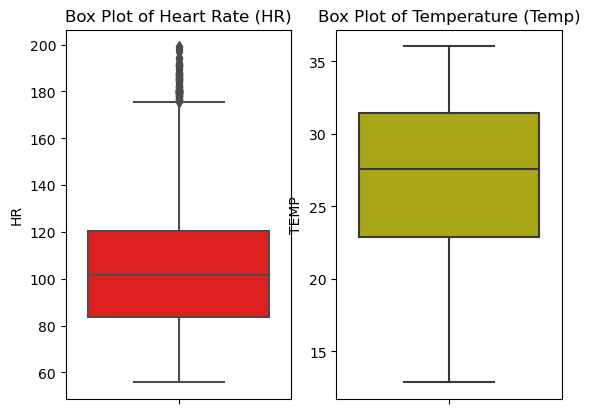

In [27]:
# Q44. Create a Box plot for HR and Temp

plt.subplot(1, 2, 1)
sns.boxplot(y='HR', data=HR,color='r')
plt.title('Box Plot of Heart Rate (HR)')

plt.subplot(1, 2, 2)
sns.boxplot(y='TEMP', data=Temp,color='y')
plt.title('Box Plot of Temperature (Temp)')

plt.show()

In [28]:
#Q.45. Find the student's Max mean EDA who are attending Final.

final_exam = EDA[EDA["Exam"]=="final"]
mean_eda = final_exam.groupby("Student_id")["EDA"].mean()
mean_eda
print("Students with mean EDA:",mean_eda)
max_mean_eda = mean_eda.max()
print("Maximum mean EDA:",max_mean_eda)

Students with mean EDA: Student_id
S01    0.103118
S02    0.078360
S03    0.169737
S04    0.526800
S05    0.542409
S06    0.129932
S07    0.212474
S08    0.534721
S09    0.402572
S10    0.111297
Name: EDA, dtype: float64
Maximum mean EDA: 0.5424094488188976


In [29]:
#Q.46 Find the Grade of a Student whose Name ends with 'S'
df_Lname = Demography[Demography['Last Name'].str.endswith('s')]
df_Grades = pd.merge(df_Lname,Grades, on="Student_id")
df_Student = df_Grades[["Last Name","Student_id","Midterm 1","Midterm 2","final"]]
df_Student

,Last Name,Student_id,Midterm 1,Midterm 2,final
0,Walters,S01,78,82,182
1,Jones,S02,82,85,180
2,Willows,S03,77,90,188
3,Wills,S08,92,88,184


        TEMP  Time in mins Student_id       Exam
0     22.080             1        S01      final
1     22.048             2        S01      final
2     22.022             3        S01      final
3     22.339             4        S01      final
4     22.416             5        S01      final
...      ...           ...        ...        ...
7213  30.176            56       S010  Midterm 2
7214  30.426            57       S010  Midterm 2
7215  30.457            58       S010  Midterm 2
7216  30.537            59       S010  Midterm 2
7217  30.448            60       S010  Midterm 2

[1800 rows x 4 columns]


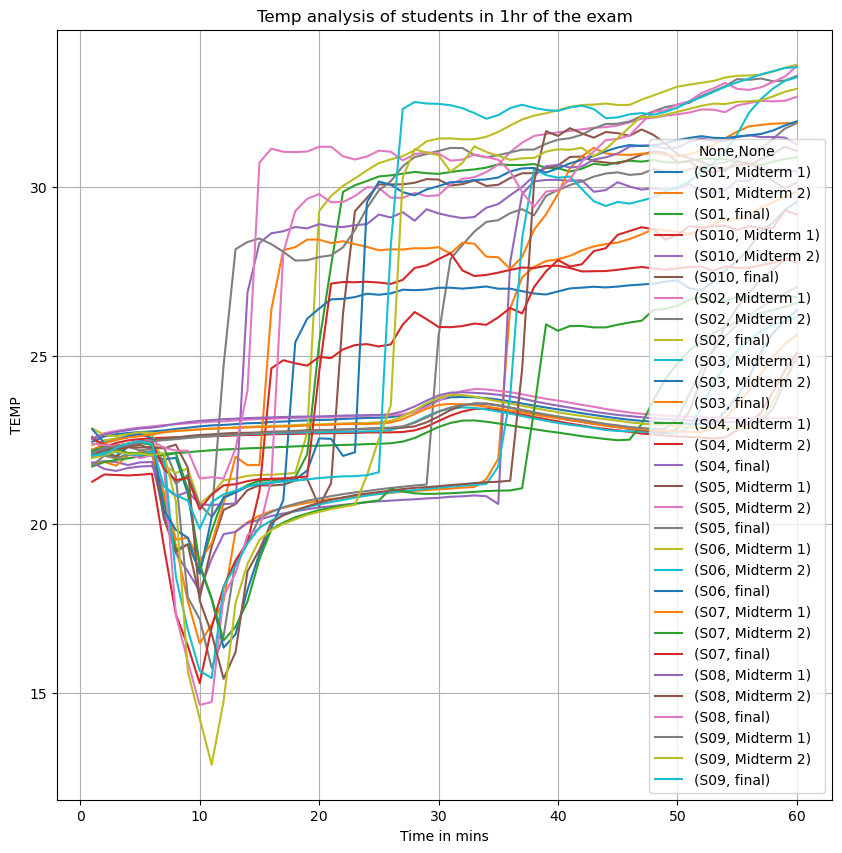

In [27]:
#Q47.Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)
Time_df = Temp.loc[Temp['Time in mins'] <=60] 
print(Time_df)

#Time_df.plot(y='TEMP', x = 'Time in mins')
Time_df.set_index('Time in mins', inplace=True)
Time_df.groupby(['Student_id','Exam'])['TEMP'].plot(legend=True, figsize=(10, 10), grid = True,title='Temp analysis of students in 1hr of the exam')
plt.ylabel("TEMP")
plt.show()

In [30]:
# Q 48. Find the Full Name of the student who has Max HR                         

df_hr = pd.DataFrame(HR)
df_student = pd.DataFrame(Demography)

# Merge dataframes on 'Student_id'
merged_df = pd.merge(df_hr, df_student, on='Student_id')

# Find the row with the maximum HR
max_hr_row = merged_df.loc[merged_df['HR'].idxmax()]

# Display the Full Name of the student with Max HR
full_name_max_hr = f"{max_hr_row['First Name']} {max_hr_row['Last Name']}"
print(f"The student with the maximum HR is: {full_name_max_hr}")


The student with the maximum HR is: John Doe


In [31]:
# Q49. [ "Python Hackthaon.","December 2023.","Numpy Ninja." ]
#       tokenise the Sentences and place it in single column

sentences = ["Python Hackathon.", "December 2023.", "Numpy Ninja."]
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
token_df = pd.DataFrame({'Tokenized Sentences': tokenized_sentences})
print(token_df)

      Tokenized Sentences
0  [Python, Hackathon, .]
1     [December, 2023, .]
2       [Numpy, Ninja, .]


In [32]:
#Q.50. Count the Students who are in the Race Group 'White'.

white_students_count = Demography["Race"].value_counts()["White"]

print("Number of students in the 'White' race group:", white_students_count)

Number of students in the 'White' race group: 4


In [33]:
#Q.51 Display the Youngest Student demographic details. with Avg Heart Rate

df_TempDG = pd.DataFrame(Demography)
df_TempDG['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_TempDG['DOB']).dt.year

#print(df_TempDG)

y_student = df_TempDG[df_TempDG['Age'] == df_TempDG['Age'].min()]

df_Young = pd.merge(y_student,HR, on="Student_id")
avg_hr = df_Young['HR'].mean()

print("Youngest Student Demography:\n")
print(y_student)
print("\nAverage Heart Rate Of youngest Student:", avg_hr)

Youngest Student Demography:

  Student_id        DOB First Name  Last Name Gender     Race  Age
6        S07 2010-08-01      Roger  Frederick      M  African   13

Average Heart Rate Of youngest Student: 103.84210238429172


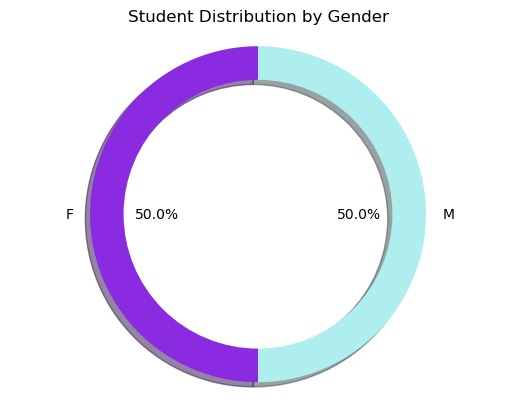

In [43]:
#Q52.plot the donut chart using Gender

gender_counts = Demography['Gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',shadow=True, startangle=90, wedgeprops=dict(width=0.2), colors=['blueviolet', 'paleturquoise'])
ax.axis('equal')  
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Student Distribution by Gender')
plt.show()

In [35]:
# Q53 Calculate the 'AGE' of the Student and Display with Student Name
df = pd.DataFrame(Demography)
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%Y')

# Calculate age based on the current date
current_date = datetime.now()
df['Age'] = (current_date - df['DOB']).dt.days//365

# Display Student Name and Age
df['Full Name'] = df['First Name'] + ' ' + df['Last Name']
print(df[['Full Name', 'Age']].to_string(index=False))

      Full Name  Age
Barbara Walters   14
     Nora Jones   14
Gabriel Willows   14
       John Doe   14
       Jane Doe   14
     Pat Murray   15
Roger Frederick   13
     John Wills   14
   Paul Cartney   14
   Janice Smith   14


In [36]:
# Q54. np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.

arr1= np.arange(1,31).reshape(6,5)
print(arr1)
arr=arr1[(0,4,5), 3:].ravel()
print('Elements after Slicing:', arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Elements after Slicing: [ 4  5 24 25 29 30]


In [37]:
#Q.55. Display the mean Heart Rate who scored Least Grade in Final.

least_grade=Grades.nsmallest(1,"final")
heart_rate = HR[HR["Student_id"]=="S07"]
mean_heartrate = heart_rate.groupby("Student_id"or"HR")["HR"].mean()
print("Mean HR of student with 'least grade' in final:")
print(mean_heartrate)

Mean HR of student with 'least grade' in final:
Student_id
S07    103.842102
Name: HR, dtype: float64


In [38]:
#Q.56 Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name
def add_prefix(row):
    if row['Gender'] == 'M':
        return 'MR ' + row['First Name'] + ' ' + row['Last Name']
    elif row['Gender'] == 'F':
        return 'MS ' + row['First Name'] + ' ' + row['Last Name']
    else:
        return row['First Name'] + ' ' + row['Last Name']

Temp_Demo = Demography.copy()
Temp_Demo['Full Name'] = Temp_Demo.apply(add_prefix, axis=1)
last_name = input('Input the Last Name of the Student: ')
FullName_df = Temp_Demo[Temp_Demo['Last Name'] == last_name]
print(FullName_df['Full Name'])

3    MR John Doe
4    MS Jane Doe
Name: Full Name, dtype: object


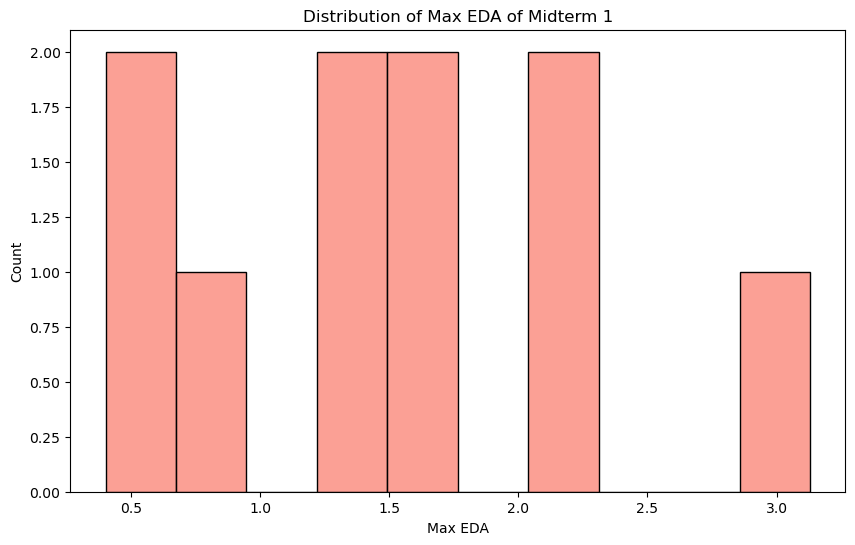

In [44]:
#Q57. Give Distrubution chart of MAX EDA of the midterm1


EDA_Exam=EDA.loc[EDA['Exam'] == 'midterm 1']


EDA_df = EDA_Exam.groupby('Student_id')['EDA'].max().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(EDA_df['EDA'],bins=10,color='salmon')
plt.title('Distribution of Max EDA of Midterm 1')
plt.xlabel('Max EDA')
plt.show()


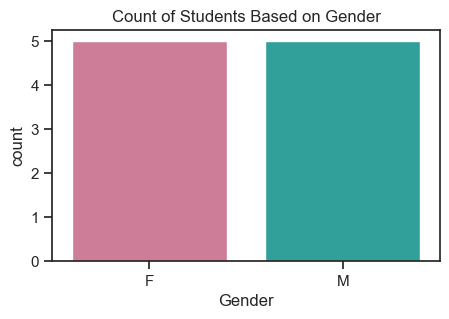

In [39]:
# Q58. Count the students based on Genderwise using count plot

df = pd.DataFrame(Demography)
chosen_colors = {'F': 'palevioletred', 'M': 'lightseagreen'}
# Create a count plot based on Gender
sns.set(style="ticks")
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=df, palette=chosen_colors)
plt.title('Count of Students Based on Gender')
plt.show()

In [40]:
# Q59. Display full name of Student who are born in year '2010'

print("Full names of students born in 2010:")
get_data = Demography[Demography['DOB'].dt.year == 2010]
for index, row in get_data.iterrows():
    full_name = f"{row['First Name']} {row['Last Name']}"
    print(full_name)

Full names of students born in 2010:
Roger Frederick


In [42]:
 # Q60. [ 1, 2, 3, 4, 5], [ 6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25], [26, 27, 28, 29, 30] In the Array,find array slicing for elements 2,8,14,20.

array = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
    [26, 27, 28, 29, 30]])

sliced_elements = array[[0, 1, 2, 3], [1, 2, 3, 4]]
print(sliced_elements)

[ 2  8 14 20]


In [43]:
#Q.61 Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.

temp_eda = pd.DataFrame(EDA)
temp_hr = pd.DataFrame(HR)

# Find the maximum EDA and mean HR for each student
max_eda = temp_eda.groupby('Student_id')['EDA'].max()
mean_hr = temp_hr.groupby('Student_id')['HR'].mean()

# Create a new dataframe with the indices and the count of records
new_dataframe61 = pd.DataFrame({'Max EDA': max_eda, 'Mean HR': mean_hr})
new_dataframe61['Record Count'] = temp_eda.groupby('Student_id').size()

# Display the new dataframe
print(new_dataframe61)

            Max EDA     Mean HR  Record Count
Student_id                                   
S01           2.198  106.522138           760
S02           1.311  114.313813           852
S03           1.651  103.283502           803
S04           5.795   98.399456           682
S05           1.611  104.806015           654
S06           2.184  104.793488           819
S07           1.485  103.842102           713
S08           2.920  105.475896           643
S09           2.756   98.802752           654
S10           1.423  106.231091           794


In [29]:
# 62.Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
 Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})

from collections import Counter

# Example list of last names
last_names = ['Doe', 'Walters', 'Doe', 'Jones', 'Willows', 'Murray', 'Frederick', 'Wills', 'Cartney', 'Smith']

# Use Counter to count occurrences of each last name
last_name_counts = Counter(last_names)

# Print the result
print("Last Name and count of Last Name Occurrence:")
print(last_name_counts)

Last Name and count of Last Name Occurrence:
Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})


In [46]:
# Q 63. Retrieve the row with minimum EDA using sorting technique.

print((EDA.sort_values('EDA')).head(1))

      EDA  Time in mins Student_id       Exam
4499  0.0           166        S06  Midterm 2


In [44]:
# Q64. get the last letter of last name of students using RegEX

Last_Name= Demography.iloc[0:10,3]
pattern = re.compile(r'^.+(.)$')
last_letters = [pattern.search(name).group(1) for name in Last_Name if pattern.search(name)]
print(last_letters)

['s', 's', 's', 'e', 'e', 'y', 'k', 's', 'y', 'h']


In [36]:
#Q.65. Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

np.random.seed(12)

random_array = np.random.randint(1, 10, size=(3, 3))

print("Randomly generated array:")
print(random_array)

np.random.seed(12)

fixed_array = np.random.randint(1, 10, size=(3, 3))


print("Fixed array for the next run:")
print(fixed_array)

Randomly generated array:
[[7 2 3]
 [4 4 1]
 [7 2 5]]
Fixed array for the next run:
[[7 2 3]
 [4 4 1]
 [7 2 5]]


In [29]:
#Q.66 find the way to reverse string for given input (eg: input : this is python hackathon output:hackathon python is this)
def reverse_string(input_string):
    
    splt_words = input_string.split()
    reverse_words = splt_words[::-1]
    reversed_str = ' '.join(reverse_words)
    
    return reversed_str

input_string = input("Enter a string: ")
reversed_str = reverse_string(input_string)
print(reversed_str)

Enter a string: this is python hackathon
hackathon python is this


In [30]:
#Q67.From'Python Hackthon Dec 2023' give 'Python Hack' using RegEX
 
import re

# Given string
text = 'Python Hackathon Dec 2023'

# Define a regular expression pattern to match 'Python Hack'
pattern = re.compile(r'Python Hack')

# Use re.search to find the match in the text
match = pattern.search(text)

# If there is a match, print the matched substring
if match:
    result = match.group()
    print(result)
else:
    print("Pattern not found in the given string.")

Python Hack


In [ ]:
# 68. Using HR values print even if it even number and odd if it odd number           

df = pd.DataFrame(HR)
# limiting output to 50
for HRv in df['HR'][:50]:
    if HRv % 2 == 0:
        print(f"{HRv} is even.")
    else:
        print(f"{HRv} is odd.")

119.023 is odd.
130.879 is odd.
131.586 is odd.
109.852 is odd.
81.178 is odd.
104.077 is odd.
120.983 is odd.
102.488 is odd.
91.792 is odd.
113.454 is odd.
130.448 is odd.
107.847 is odd.
109.524 is odd.
122.502 is odd.
122.382 is odd.
110.747 is odd.
125.319 is odd.
119.67 is odd.
108.982 is odd.
97.405 is odd.
102.08 is odd.
120.906 is odd.
112.128 is odd.
93.411 is odd.
86.594 is odd.
86.113 is odd.
89.43 is odd.
79.7 is odd.
78.826 is odd.
81.971 is odd.
78.772 is odd.
84.092 is odd.
82.418 is odd.
71.969 is odd.
68.595 is odd.
113.975 is odd.
123.115 is odd.
120.086 is odd.
118.711 is odd.
122.379 is odd.
106.509 is odd.
87.41 is odd.
95.061 is odd.
92.837 is odd.
110.937 is odd.
98.258 is odd.
74.857 is odd.
86.82 is odd.
108.975 is odd.
113.8 is odd.


In [24]:
# Q69. Input any string from user, Convert that into a tuple and then find the lenghth of that tuple

string = input("Enter a String: ")
string_tuple = tuple(string)
length_tuple= len(string_tuple)
print('Input as a tuple:', string_tuple)
print('Length of the tuple:',length_tuple)

Enter a String: Shephali
Input as a tuple: ('S', 'h', 'e', 'p', 'h', 'a', 'l', 'i')
Length of the tuple: 8


In [ ]:
# Q.70.Find the students who has 'o' in their names and print them.

students_with_o=Demography[(Demography["First Name"].str.contains("o",case=True))|(Demography["Last Name"].str.contains("o",case=True))]
print("Students whose First or Last Name contains letter o:")
print(students_with_o)

Students whose First or Last Name contains letter o:
  Student_id        DOB First Name  Last Name Gender     Race
1        S02 2009-02-02       Nora      Jones      F    White
2        S03 2009-07-12    Gabriel    Willows      F    Asian
3        S04 2009-09-09       John        Doe      M    Asian
4        S05 2009-05-06       Jane        Doe      F  African
6        S07 2010-08-01      Roger  Frederick      M  African
7        S08 2009-03-03       John      Wills      M    White


In [21]:
#Q.71 Creat the visualisation to count the student based on race

race_counts = pd.DataFrame(Demography)
race_counts1= race_counts['Race'].value_counts()
Student_Race = race_counts1.index
Student_Count = race_counts1.values

figure_71 = px.bar(race_counts1, x=Student_Race, y=Student_Count, color=Student_Count,
             color_continuous_scale = 'tealgrn',
             title = 'Number Of Students Based On Race',
             hover_data=[Student_Race, Student_Count],
             text_auto='2s',
             labels= {"index":'Race',"y":'Count Of Students'})
figure_71.update_xaxes(showgrid=False)
figure_71.update_yaxes(showgrid=False)
figure_71.update_traces(hovertemplate=None)
figure_71.update_layout(hovermode="x")
figure_71.show()

In [31]:
# Q72.select 25 different random values between 366 to 500. code should generates same value if we run again.
np.random.seed(65)
random_values = np.random.choice(np.arange(366, 501), size=25, replace=False)

print("Random values:", random_values)

Random values: [424 387 478 451 394 421 487 415 425 378 482 442 435 405 489 443 444 450
 476 480 472 386 499 397 438]


In [ ]:
# 73. Find the max EDA of the higest scoring student (whose average of midterm1,midterm2 and Final is maximum)

import pandas as pd

Grades['Average'] = Grades[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)

top_student = Grades.loc[Grades['Average'].idxmax()]

max_eda = EDA.loc[EDA['Student_id'] == top_student['Student_id'], 'EDA'].max()

print(f"The max EDA for the highest-scoring student is: {max_eda}")

The max EDA for the highest-scoring student is: 2.92


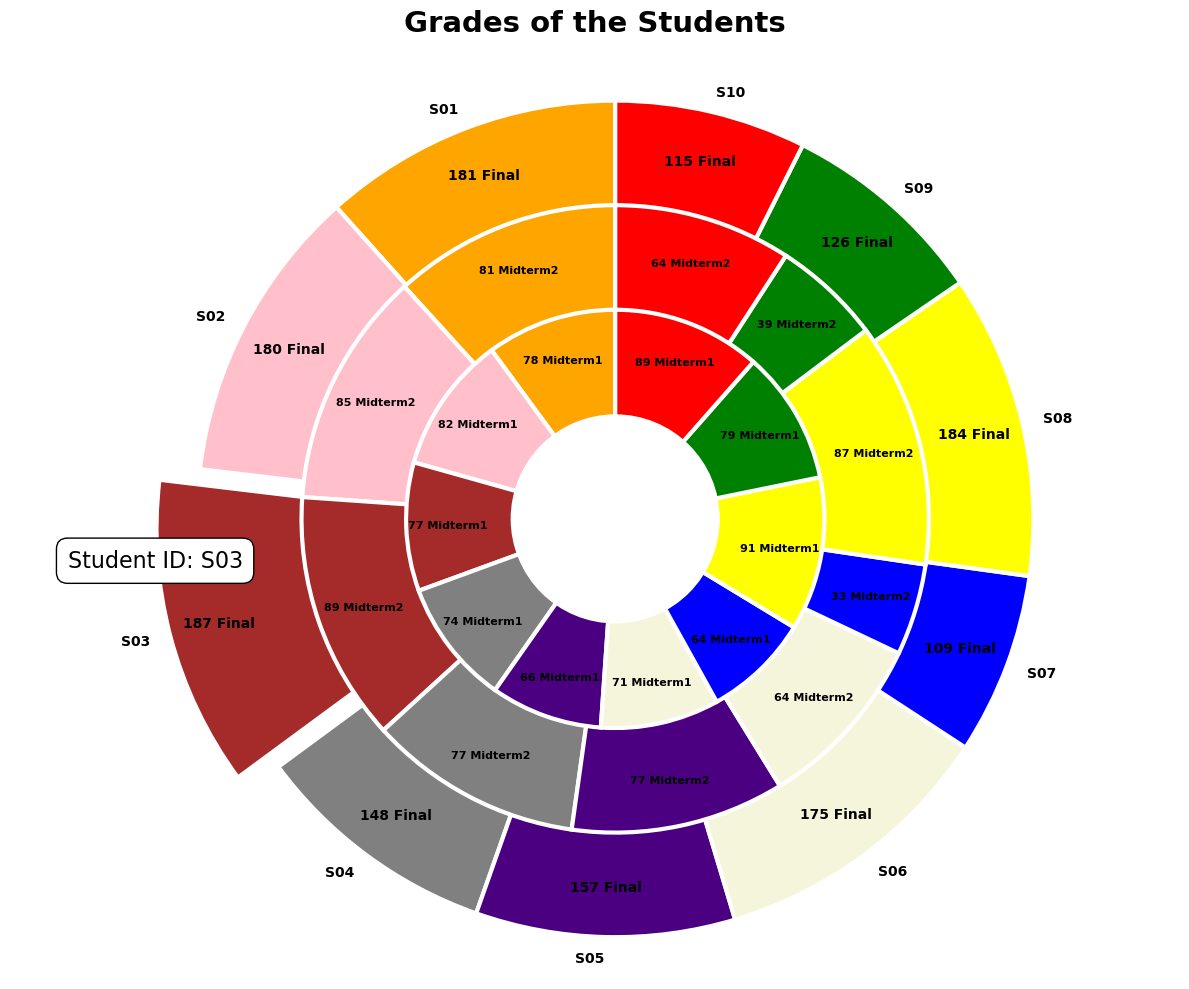

In [25]:
# Q74. Create a Pie chart for Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

Grades_final = Grades.iloc[0:10,3]
Grades_midterm1 = Grades.iloc[0:10,1]
Grades_midterm2 = Grades.iloc[0:10,2]
explode_label= Grades.loc[:, "Student_id":"final":3]
colors = ( "orange", "pink", "brown",
          "grey", "indigo", "beige","blue","yellow","green","red")
explode = [0.1 if i == Grades_final.idxmax() else 0 for i in range(len(Grades))]
plt.figure(figsize=(12,10))
def func(pct, allvals, label):
    absolute = int(pct/100.*np.sum(allvals))
    #r"\b(?=\w)" + re.escape(TEXTO) + r"\b(?!\w)"
    
    return (r"{:d} " + re.escape(label) + "").format(absolute, label)
plt.pie(Grades_final,labels=Grades.iloc[0:10,0],
       startangle=90,colors=colors,explode=explode,pctdistance=0.88,autopct=lambda pct: func(pct, Grades_final, "Final"),radius=1.0,
       labeldistance=1.05,textprops={'fontweight':'bold','fontsize':10},
       wedgeprops={'linewidth':3,'edgecolor':'white'})
plt.pie(Grades_midterm2,
       startangle=90,colors=colors,pctdistance=0.85,autopct=lambda pct: func(pct, Grades_midterm2, "Midterm2"),radius=0.75,
       textprops={'fontweight':'bold','fontsize':8},
       wedgeprops={'linewidth':3,'edgecolor':'white'})
plt.pie(Grades_midterm1,
       startangle=90,colors=colors,pctdistance=0.8,autopct=lambda pct: func(pct, Grades_midterm1, "Midterm1"),radius=0.5,
       textprops={'fontweight':'bold','fontsize':8},
       wedgeprops={'linewidth':3,'edgecolor':'white'})
center_circle= plt.Circle((0,0),0.25,fc='white')
plt.title('Grades of the Students',fontweight="bold",fontsize=21,pad=20)
highest_grade_index = Grades_final.idxmax()
plt.text(-1.1,-0.1, f'Student ID: {explode_label.at[highest_grade_index, "Student_id"]}', ha='center', va='center', fontsize=16, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [44]:
#Q.75. Find min temparature of the student whose average score (midterm1,midterm2, final) is minimum

least_grade_midterm1=Grades.nsmallest(1,"Midterm 1")
least_grade_midterm2=Grades.nsmallest(1,"Midterm 2")
least_grade_final=Grades.nsmallest(1,"final")
#print(least_grade_midterm1)
#print(least_grade_midterm2)
#print(least_grade_final)
least_average_grade = Grades[["Midterm 1", "Midterm 2", "final"]].mean(axis=1).min()
print(least_average_grade)
Temp = Temp[Temp["Student_id"]=="S07"]
min_temp = Temp.groupby("Student_id")["TEMP"].min()
print("Minimun Temp of student with minimum grade:")
print(min_temp)

69.0
Minimun Temp of student with minimum grade:
Student_id
S07    16.552
Name: TEMP, dtype: float64


In [22]:
# Q.76 Plot the time series of HR( every 5 mins) of student07

HR_07 = HR[HR['Student_id'] == 'S07'][['Student_id','Time in mins','HR','Exam']]
#print(HR_07)
HR_07['Time in mins'] = HR_07['Time in mins'].astype(int)
HR_07_grouped_and_sorted = HR_07.groupby('Exam').apply(lambda x: x.sort_values('Time in mins'))
#print(HR_07_grouped_and_sorted)
HR07_mean_hr = HR_07_grouped_and_sorted.HR.rolling(5).mean()
#print(HR07_mean_hr)

#Plot the graph    
figure_76 = px.line(HR07_mean_hr, x=HR_07_grouped_and_sorted['Time in mins'], y=HR07_mean_hr, 
              color=HR_07_grouped_and_sorted['Exam'],
              title="Time Series of HR for Student S07", 
              labels={"x":"Time In Minutes","y":"Mean Heart Rate(Every 5 Minutes)"})
figure_76.update_xaxes(showgrid=False)
figure_76.update_traces(mode="markers+lines", hovertemplate=None)
figure_76.update_layout(hovermode="x")

figure_76.show()

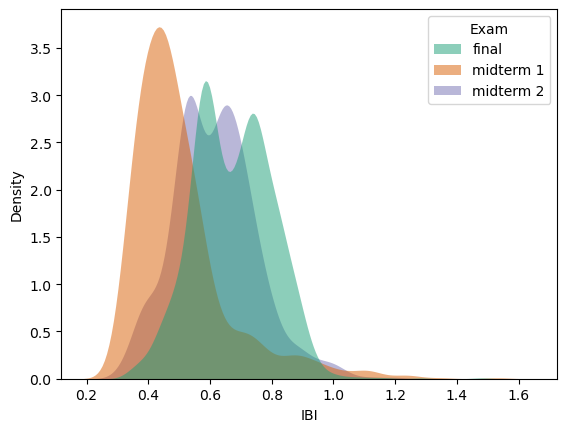

In [33]:
#Q77.Plot the density chart for IBI

import seaborn as sns
import numpy as np
sns.kdeplot(data=IBI,
            x="IBI",
            hue = "Exam",fill=True,
            common_norm=False,
            palette= "Dark2",
            alpha=0.5,linewidth=0 )
plt.show()

In [ ]:
# Q78. Convert gender into numeric by one-hot encoding 

df = pd.DataFrame(Demography)
df['Male'] = (df['Gender'] == 'M').astype(int)
df['Female'] = (df['Gender'] == 'F').astype(int)
df = df.drop(columns=['Gender'])
print(df)

  Student_id        DOB First Name  Last Name     Race  Male  Female
0        S01 2009-01-01    Barbara    Walters    White     0       1
1        S02 2009-02-02       Nora      Jones    White     0       1
2        S03 2009-07-12    Gabriel    Willows    Asian     0       1
3        S04 2009-09-09       John        Doe    Asian     1       0
4        S05 2009-05-06       Jane        Doe  African     0       1
5        S06 2008-04-04        Pat     Murray  African     1       0
6        S07 2010-08-01      Roger  Frederick  African     1       0
7        S08 2009-03-03       John      Wills    White     1       0
8        S09 2009-10-23       Paul    Cartney    White     1       0
9        S10 2009-11-14     Janice      Smith  Spanish     0       1


In [27]:
# Q79. Convert ' race' into numeric by Label encoding

lab = LabelEncoder()
Demography['Race_encoded'] = lab.fit_transform(Demography['Race'])
Demography

,Student_id,DOB,First Name,Last Name,Gender,Race,Age,Race_encoded
0,S01,2009-01-01,Barbara,Walters,F,White,14.0,3
1,S02,2009-02-02,Nora,Jones,F,White,14.0,3
2,S03,2009-07-12,Gabriel,Willows,F,Asian,14.0,1
3,S04,2009-09-09,John,Doe,M,Asian,14.0,1
4,S05,2009-05-06,Jane,Doe,F,African,14.0,0
5,S06,2008-04-04,Pat,Murray,M,African,15.0,0
6,S07,2010-08-01,Roger,Frederick,M,African,13.0,0
7,S08,2009-03-03,John,Wills,M,White,14.0,3
8,S09,2009-10-23,Paul,Cartney,M,White,14.0,3
9,S10,2009-11-14,Janice,Smith,F,Spanish,14.0,2


5.795
104.90788117200218


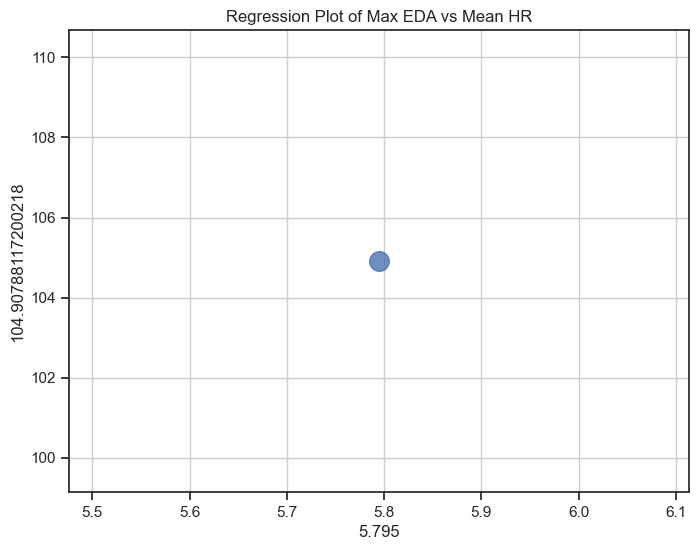

In [ ]:
#Q.80. Create a Regression Plot on Max EDA and mean HR
max_EDA=EDA.nlargest(1,"EDA")["EDA"].values[0]
print(max_EDA)
mean_heartrate = HR["HR"].mean()
print(mean_heartrate)
data = pd.DataFrame({'Max EDA': [max_EDA], 'Mean HR': [mean_heartrate]})
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Max EDA', y='Mean HR', scatter_kws={'s': 200})
plt.xlabel(max_EDA)
plt.ylabel(mean_heartrate)
plt.title("Regression Plot of Max EDA vs Mean HR")
plt.grid(True)
plt.show()